# Lotka-Volterra Model

_(tv) 2016-12-06, 2024-06-24_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import scipy

In [285]:
import itertools
def colorcycle():
    """ return the standard color cycle """
    return itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

The Lotka-Volterra model is a predator-prey model of the form
\begin{align*} \partial_tc_X(x,t)&=k_1c_X(x,t)-k_2c_X(x,t)c_Y(x,t)+D_X\partial_x^2c_X(x,t)\\
\partial_tc_Y(x,t)&=k_2c_X(x,t)c_Y(x,t)-k_3c_Y(x,t)+D_Y\partial_x^2c_Y(x,t) \end{align*}
In dimensionless variables for the homogeneous state (no diffusion terms relevant), we obtain
\begin{align*} \frac{du}{d\tau}&=u(1-v) & \frac{dv}{d\tau}&=\alpha v(u-1) \end{align*}
with $\tau=k_1t$, $\alpha=k_3/k_1$, $u=(k_2/k_3)c_X$, $v=(k_2/k_1)c_Y$.

## Phase-Space Portrait

The model has Hamiltonian structure: the quantity $$H(u,v)=\alpha u+v-\ln(u^\alpha v)$$ is a conserved quantity. We plot the phase-space portrait of the model.

In [3]:
def H(u,v,alpha):
    return alpha*u+v-np.log(u**alpha*v)

/tmp/ipykernel_1750260/3496382122.py:2: RuntimeWarning: divide by zero encountered in log
  return alpha*u+v-np.log(u**alpha*v)


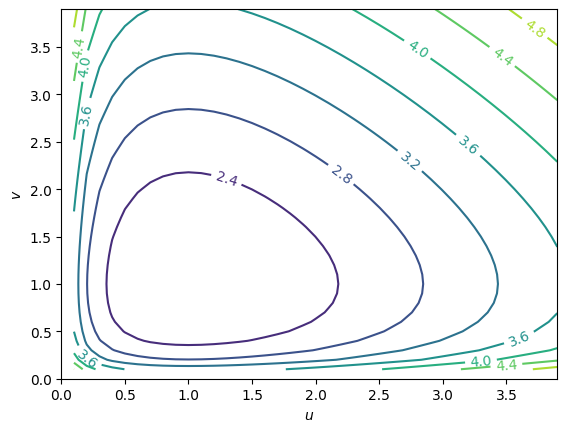

In [23]:
fig,ax=plt.subplots()
u_,v_ = np.meshgrid(np.arange(0.,4,0.1),np.arange(0.,4,0.1))
cs = plt.contour(u_,v_,H(u_,v_,alpha=1))
ax.clabel(cs,cs.levels)
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.show()

In fact, `matplotlib` has a nice method to create "stream plots", where we see both the contour lines and the tangents along those contours. Typically for the Lotka-Volterra model in the $(u,v)$ plane, the direction of the dynamics in phase space is _counter-clockwise_.

In [20]:
def lotka_volterra(t,uv,alpha):
    u,v = uv
    return [u*(1-v),alpha*v*(u-1)]

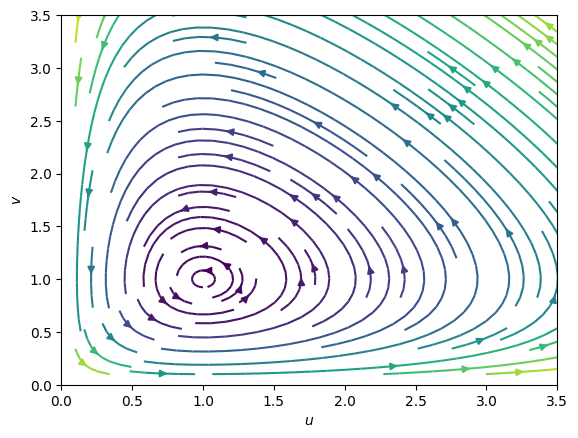

In [24]:
fig,ax=plt.subplots()
u_,v_ = np.meshgrid(np.arange(0.1,4.001,0.5),np.arange(0.1,4.001,0.5))
du_,vu_ = lotka_volterra(None,[u_,v_],alpha=1)
cs = plt.streamplot(u_,v_,du_,dv_,color=H(u_,v_,alpha=1))
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.show()

## Dynamics of the Homogeneous Model

The dynamics of the model needs to be solved numerically. This is easily coded using `scipy.integrate.solve_ivp`, but the usual caveat applies: this is a Hamiltonian system, so we should really choose an integrator that respects the conservation law, while the standard (Runge-Kutta-type) numerics will suffer from a drift in $H$. We don't notice it too much over the relatively short time intervals here, but in the phase-space portrait you can already see that the line doesn't trace itself correctly as it should.

In [27]:
lvsol=scipy.integrate.solve_ivp(lotka_volterra, (0,20), [2,3], t_eval=np.arange(0,20,0.05),args=(1,))

/tmp/ipykernel_1750260/3496382122.py:2: RuntimeWarning: divide by zero encountered in log
  return alpha*u+v-np.log(u**alpha*v)


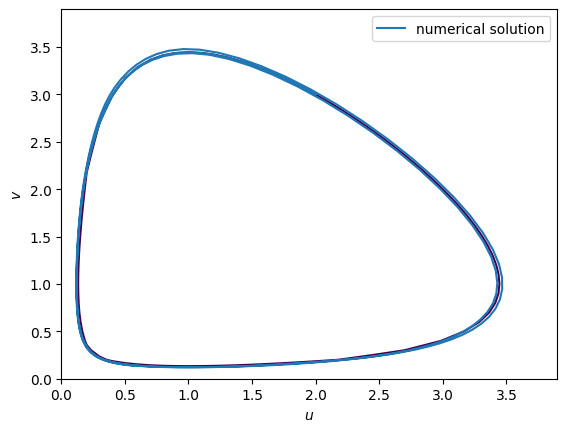

In [52]:
fig=plt.figure()
u_,v_ = np.meshgrid(np.arange(0.,4,0.1),np.arange(0.,4,0.1))
plt.contour(u_,v_,H(u_,v_,alpha=1),levels=[H(lvsol.y[0,0],lvsol.y[1,0],alpha=1)])
plt.plot(lvsol.y[0,:],lvsol.y[1,:],label='numerical solution')
plt.legend()
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.show()

This is a typical result for the time-dependent dynamics: since the phase-space portraits are closed loops, the functions $u(\tau)$ and $v(\tau)$ are periodic (but not, and in fact far from harmonic). Counter-clockwise motion in the $(u,v)$ plane implies that a decrease in $u(\tau)$ is connected with an increase in $v(\tau)$, so the peaks of $v(\tau)$ follow just after those of $u(\tau)$.

In the interpretation, $u$ is the prey population, while $v$ are the predators: Thus, in absence of predactors, the prey proliferates, until its population growth allows a growth also in predator population, until the predators diminuish the prey. Once the prey population has gone down, so does the predator population, allowin the prey to grow again, and then the cycle repeats.

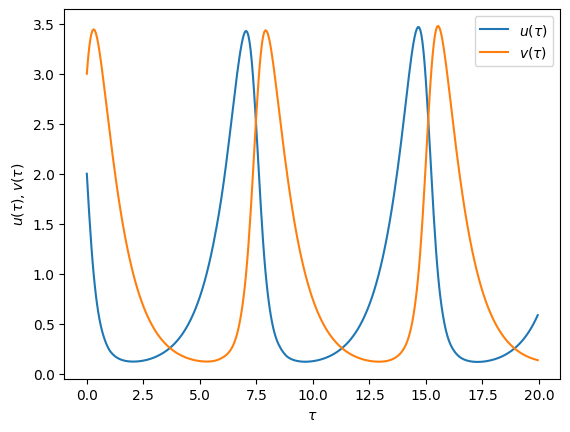

In [55]:
fig=plt.figure()
plt.plot(lvsol.t,lvsol.y[0,:], label=r'$u(\tau)$')
plt.plot(lvsol.t,lvsol.y[1,:], label=r'$v(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$u(\tau),v(\tau)$')
plt.legend()
plt.show()

## The Hudson Bay Data

The famous historical observation is of the population of hare and lynx by the Hudson Bay Company in the latter half of the 19th century. Here is some data (taken from Murray, Mathematical Biology):

In [127]:
#bay_data = np.array([[ 0,42,103 ],[ 1,38,98 ],[ 2,22,69 ],[ 3,16,17 ],[ 4,10,10 ],[ 5,8,18 ],
#          [ 6,8,17 ],[ 7,32,16 ],[ 8,53,47 ],[ 9,77,55 ],[ 10,81,139 ],[ 11,33,139 ],
#          [ 12,20,94 ],[ 13,13,37 ],[ 14,7,21 ],[ 15,6,50 ],[ 16,10,53 ],[ 17,21,66 ],
#          [ 18,34,60 ],[ 19,55,81 ],[ 20,40,96 ],[ 21,28,56 ],[ 22,16,17 ],
#          [ 23,4,4 ],[ 24,6,2 ],[ 25,10,15 ],[ 26,21,2 ],[ 27,35,6 ],[ 28,51,46 ],
#          [ 29,82,61 ]])

In fact this seems to be just one data set out of a much wider set, so let's update this:

The data was kindly made available by Douglas R. Hundley (Whitman College), see http://people.whitman.edu/~hundledr/courses/M250F03/M250.html

There have been several discussions about this data, and let me quote verbatim Douglas R. Hundley on some caveats:

"**NOTE** about the data: I have not been able to verify this data, but this is the data (or rather the graph) that is always cited. This particular set of data came from scanning in the graph from Odum's "Fundamentals of Ecology", p. 191 which is often cited. Odum says that his graph is taken from MacLulich's "Fluctuations in the numbers of varying hare", 1937, which is not widely available. Some authors caution that this data is actually a composition of several time series, and should probably not be analyzed as a whole, and that some of the lynx data was actually missing. It is said that the data was collected from Hudson's Bay historical records, and does not reflect animal populations, but rather the number of pelts turned in for trading (a large number of which came from Native Americans- mentioned because there were some medical outbreaks during these years which could account for skewed data). The data is presented here with these cautions." [D. R. Hundley, Course Introduction to Mathematical Modeling, 2003]

In [104]:
url = 'http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
import pandas as pd
df = pd.read_csv(url, delim_whitespace=True, header=None, index_col=0)
df.index_name = 'year'
df.columns = ['hare','lynx']

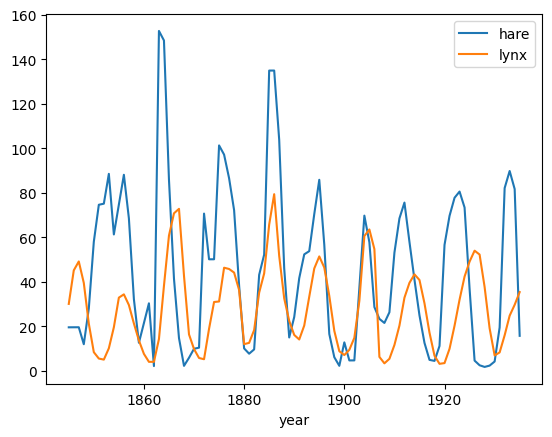

In [287]:
fig = plt.figure()
colors = colorcycle()
c = next(colors)
plt.plot(df.index,df['hare'],color=c,label='hare')
#plt.plot(bay_data[:,0]+1875,bay_data[:,2],color=c,linestyle='dashed')
c = next(colors)
plt.plot(df.index,df['lynx'],color=c,label='lynx')
#plt.plot(bay_data[:,0]+1875,bay_data[:,1],color=c,linestyle='dashed')
plt.xlabel('year')
plt.legend()
plt.show()

This sort-of shows the oscillatory behavior we expect from the Lotka-Volterra model.

Here is a phase-space portrait.

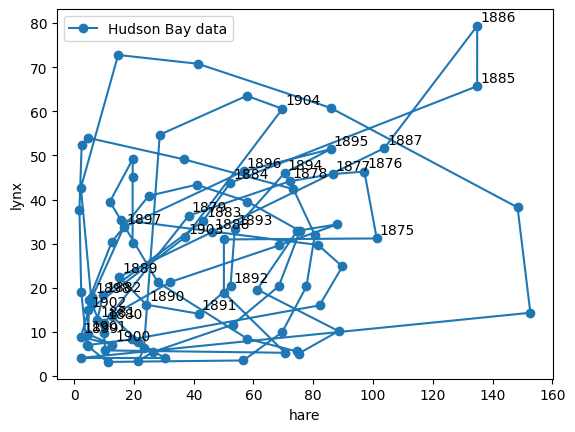

In [124]:
fig,ax = plt.subplots()
plt.plot(df['hare'],df['lynx'],'o-',label='Hudson Bay data')
for t,x,y in list(zip(df.index,df['hare'],df['lynx']))[30:60]:
    ax.annotate('{}'.format(t), xy=(x+1,y+1), textcoords='data')
plt.xlabel('hare')
plt.ylabel('lynx')
plt.legend()
plt.show()

Let us try to guess the periodicity in this data. To this end, form the autocorrelation function of the signal, and find inflection points with negative sign. These are the peaks of the autocorrelation function, and the strongest peak should correspond to the main period.

The code here was taken from https://stackoverflow.com/questions/68293136/know-the-period-of-a-stationary-series

In [355]:
def find_period(timeseries):
    acf = np.correlate(timeseries, timeseries, 'full')[-len(timeseries):]
    inflection = np.diff(np.sign(np.diff(acf)))
    peaks = (inflection < 0).nonzero()[0] + 1
    return peaks[acf[peaks].argmax()]

In [277]:
find_period(df['hare']),find_period(df['lynx'])

(10, 10)

Note that our analysis of the Lotka-Volterra model (in linear stability analysis around the fixed-point) gave a period of $T=2\pi/\sqrt{\alpha}$

In [278]:
(2.*np.pi/10.)**2.

0.3947841760435743

This gives a ballpark for $\alpha$. It is not quite correct, because we are relatively far from the fixed point. But it allows to find a reasonable fit after a bit of experimenting; we show here just a segment of the time series for better visibility. Note something odd about the positions of the peaks: in the real-world data, the predator-peak doesn't show the phase shift relative to the prey-peak, that we were expecting from the model. At least, if we assume the hare to be the prey... This reflects a long discussion of this data: are the prey eating the predators?

In [263]:
lvsol_bay=scipy.integrate.solve_ivp(lotka_volterra, (0,100), [3,2],
                                    t_eval=np.arange(0,100,0.1),
                                    args=(0.58,),rtol=1e-10,atol=1e-10)

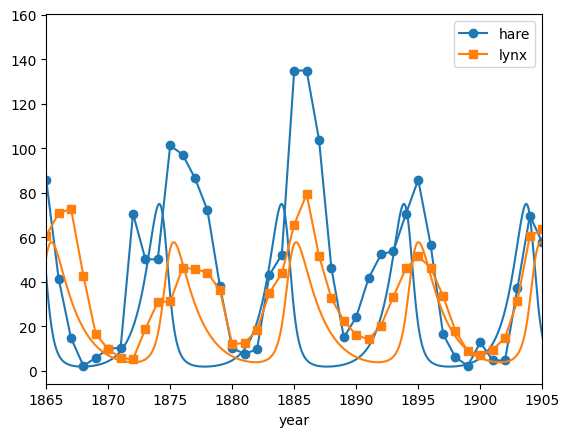

In [296]:
fig = plt.figure()
colors = colorcycle()
c = next(colors)
plt.plot(df.index,df['hare'],'o-',color=c,label='hare')
plt.plot(lvsol_bay.t+df.index[0],20*lvsol_bay.y[0,:],color=c)
c = next(colors)
plt.plot(df.index,df['lynx'],'s-',color=c,label='lynx')
plt.plot(lvsol_bay.t+df.index[0],20*lvsol_bay.y[1,:],color=c)
plt.xlim(df.index[0]+20,df.index[0]+60)
plt.xlabel('year')
plt.legend()
plt.show()

In fact the fit is not terribly good, since especially the hare population seems to vary much more widely in the data. This is seen in the phase-space plot:

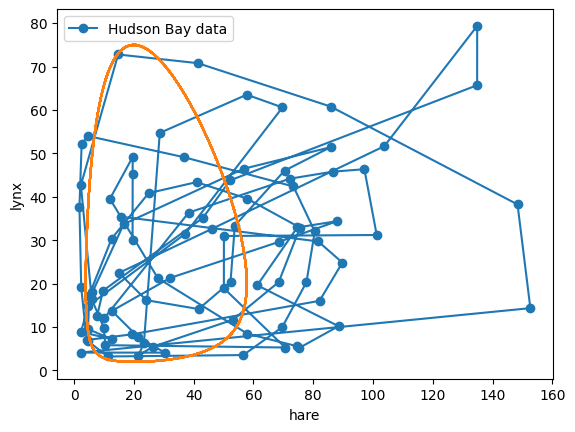

In [295]:
fig = plt.figure()
plt.plot(df['hare'],df['lynx'],'o-',label='Hudson Bay data')
plt.plot(20*lvsol_bay.y[1,:],20*lvsol_bay.y[0,:])
plt.legend()
plt.xlabel('hare')
plt.ylabel('lynx')
plt.show()

## Lattice Model with Diffusing Species

We now briefly discuss a variant of the Lotka-Volterra model, following [Chen and Täuber, Phys. Biol. 13, 025005 (2016)](https://doi.org/10.1088/1478-3975/13/2/025005) (also at [arXiv:1511.05114](https://arxiv.org/abs/1511.05114)).

In [298]:
from numba import njit, config
from numba.extending import overload
import numba

We start with defining some helper functions to simulate lattice Markov processes on lattices with periodic boundary conditions. Much of the following code started out very generally for arbitrary dimensions, but due to performance issues we need python's just-in-time compiler, and for that we need to specify things down to two-dimensional lattices.

In [310]:
# helper to generate a list of unit vectors pointing to the nearest neighbors of the d-dimensional lattice
def squareGrid (d):
    return (np.array(list(map(lambda e:(e,-e),np.identity (d,dtype="int")))).reshape(2*d,d))

The simulations are a bit heavy, so numba just-in-time compilation really is in order. There is a balance between readability/generalizability of the code to arbitrary dimensions, and performance: Readability is great with numpy arrays and position indices that are d-tuples. But numba doesn't like dynamic tuple creation. As a workaround, we provide a numba-safe version of the indexing method for two dimensions. See below for more comments.

In [311]:
@njit
def pbcwrap (i, w):
    return (i%w)
def pbcwrap2 (ij,wh,dim):
    return makeidx([pbcwrap(ij[d],wh[d]) for d in range(len(ij))])
@overload(pbcwrap2)
def ol_pbcwrap2 (ij,wh,dim):
    if dim == numba.types.int64:
        return lambda ij, wh, dim: makeidx2([pbcwrap(ij[d],wh[d]) for d in range(len(ij))])
    return None
def makeidx (pos):
    """ convert vector pos into a tuple for indexing an numpy array, generic version """
    return tuple(pos)
@njit
def makeidx2 (pos):
    """ convert vector pos into a 2-tuple for indexing: specifically only for 2dim,
        but numba's jit knows how to deal with this """
    return (pos[0],pos[1],)
#makeidx_dispatch = { 2: makeidx2 }

Specification of the model: we deal with two species that here are labeled 'A' and 'B'. Each lattice site can hold at most one random walker of that species, or be empty.

In [312]:
A_,empty_,B_ = -1,0,1

At each Monte Carlo step, we choose one of four possible actions at random and with equal probability: (i) diffuse, (ii) predator dies, (iii) predator eats prey and reproduces, (iv) prey reproduces.

The binary reactions take place on adjacent lattice sites, in a randomly chosen direction, and only if the neighboring lattice has the right occupation type.

Following Chen and Täuber, the parameters of the model are called $(D,\mu,\lambda,\sigma)$, where $D$ controls the diffusion of both species (for simplicity set identical), $\mu$ controls the death rate of species 'A' (the predator), $\lambda$ the rate of predator-prey interaction, and $\sigma$ the reproduction rate of species 'B' (the prey).

From this, we expect a qualitative correspondence of parameters according to $(\sigma,\lambda,\mu)\sim(k_1,k_2,k_3)$.

In [313]:
@njit
def step(state,directions,D,mu,lam,sigma,dim):
    pos = np.random.choice(state.shape[0],size=dim)
    action = np.random.random()
    newpos = pos + directions[np.random.choice(len(directions))]
    pos_idx = pbcwrap2(pos,np.array(state.shape),dim)
    newpos_idx = pbcwrap2(newpos,np.array(state.shape),dim)
    if action < 1/4:
        # diffusion
        if state[pos_idx] != empty_ and np.random.random()<D:
            if state[newpos_idx]==empty_:
                state[newpos_idx] = state[pos_idx]
                state[pos_idx] = empty_
    elif action < 1/2:
        # A dies with probability mu
        if state[pos_idx]==A_ and np.random.random()<mu:
            state[pos_idx] = empty_
    elif action < 3/4:
        # A eats B with probability lambda, produces A+A
        if state[pos_idx]==A_:
            if state[newpos_idx]==B_ and np.random.random()<lam:
                state[newpos_idx] = A_
    else:
        # B reproduces with probability sigma
        if state[pos_idx]==B_:
            if state[newpos_idx]==empty_ and np.random.random()<sigma:
                state[newpos_idx] = B_
    return state

We run the model and calculate the density of the species simply as the sum of particles of that type per lattice site; currently there is no averaging over runs here, as we assume the lattice to be big enough to give reasonable statistics. This could and probably should be improved.

In [314]:
@njit
def runimpl (init, directions, D,mu,lam,sigma, Nmax, Ninit, dim, Nlat):
    state = np.copy(init)
    dim = len(state.shape)
    rho = np.zeros((Nmax-Ninit-1,2))
    for n in range(Nmax):
        state = step (state, directions, D, mu, lam, sigma, dim)
        if n > Ninit:
            rho[n-Ninit-1,0] = np.sum(state==A_)/Nlat
            rho[n-Ninit-1,1] = np.sum(state==B_)/Nlat
    return state, rho
def run (init, D,mu,lam,sigma, Nmax, Ninit, dim):
    return runimpl(init,squareGrid(dim),D,mu,lam,sigma,Nmax,Ninit,dim,np.prod(init.shape))

Make an initial state with a given density of 'A' and 'B', scattered randomly across the lattice.

In [315]:
def initial_state(L,dim,rhoA,rhoB):
    rho = rhoA+rhoB
    return np.random.choice(np.array([A_,empty_,B_],dtype=int),
                            p=[rhoA,1-rho,rhoB],size=tuple(np.ones(dim,dtype=int)*int(L)))

We run a few cases for $L=50$; the parameters are those found in the Chen/Täuber publication. Note that they are using $L=1024$, but this would take too long in our python implementation. Note also that we are actually not including any diffusion here (just as Chen/Täuber).

In [316]:
L = 50
state = initial_state(L,2,0.3,0.3)
rho = {}
s = {}
for label,lam in [('run1',0.25),('run2',0.049),('run3',0.035)]:
    s[label],rho[label] = run(state,D=0.,mu=0.025,lam=lam,sigma=1, Nmax=10000000, Ninit=0, dim=2)

The lattice model has Lotka-Volterra-type dynamics for small enough $\lambda$, but also has cases where it runs into a fixed point of extinction of one species.

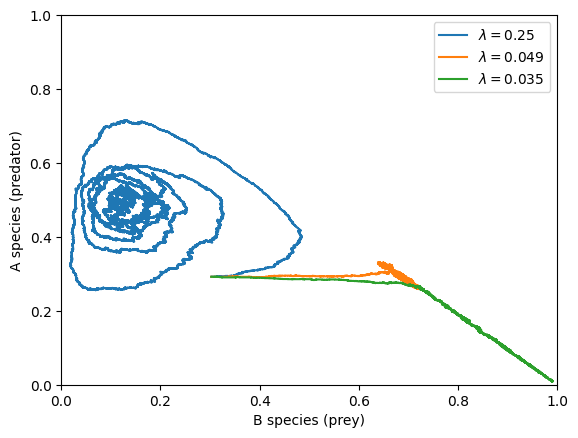

In [323]:
fig = plt.figure()
for r,l in zip(['run1','run2','run3'],[0.25,0.049,0.035]):
    plt.plot(rho[r][:,1],rho[r][:,0],label=r'$\lambda={}$'.format(l))
plt.legend()
plt.xlabel('B species (prey)')
plt.ylabel('A species (predator)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

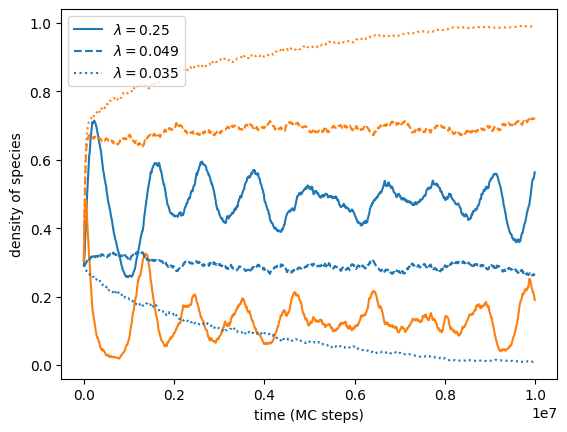

In [329]:
fig = plt.figure()
for r,l,ls in zip(['run1','run2','run3'],[0.25,0.049,0.035],['solid','dashed','dotted']):
    colors = colorcycle()
    c = next(colors)
    plt.plot(np.arange(rho[r].shape[0])[::10000],rho[r][:,0][::10000],color=c,linestyle=ls,label=r'$\lambda={}$'.format(l))
    c = next(colors)
    plt.plot(np.arange(rho[r].shape[0])[::10000],rho[r][:,1][::10000],color=c,linestyle=ls)
plt.legend()
plt.xlabel('time (MC steps)')
plt.ylabel('density of species')
plt.show()

This is how the lattices look like at the end of the runs:

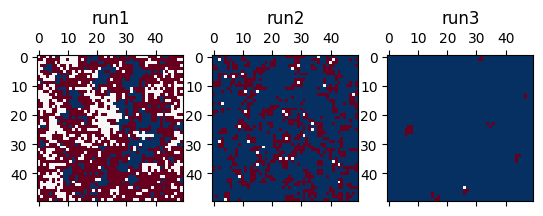

In [335]:
fig,axes = plt.subplots(nrows=1,ncols=3)
for r,ax in zip(['run1','run2','run3'],axes):
    state = s[r]
    ms = ax.matshow(state,cmap=plt.get_cmap('RdBu',np.max(state)-np.min(state)+1))
    ax.set_title(r)
#cbar = plt.colorbar(ms,ticks=np.arange(-1,2))
#cbar.ax.set_yticklabels(['A','empty','B'])
plt.show()

We can try to compare the oscillating state to the Lotka-Volterra model: this is less straight-forward than it seems.

In [393]:
find_period(rho['run1'][::10000,1])

114

In [401]:
lvsol2=scipy.integrate.solve_ivp(lotka_volterra, (0,100), [1.3,1.3],
                                    t_eval=np.arange(0,100,0.1),
                                    args=(0.28,),rtol=1e-10,atol=1e-10)

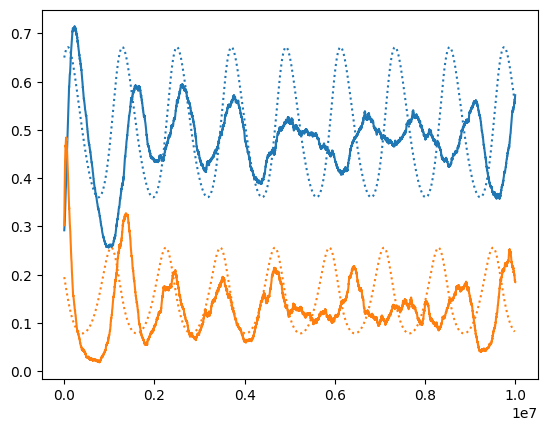

In [402]:
fig = plt.figure()
for r in ['run1']:
    colors = colorcyle()
    c = next(colors)
    plt.plot(np.arange(rho[r].shape[0])[::1000],rho[r][:,0][::1000],color=c)
    plt.plot(lvsol2.t*1e5,lvsol2.y[1,:]*0.5,color=c,linestyle='dotted')
    c = next(colors)
    plt.plot(np.arange(rho[r].shape[0])[::1000],rho[r][:,1][::1000],color=c)
    plt.plot(lvsol2.t*1e5,lvsol2.y[0,:]*0.15,color=c,linestyle='dotted')
plt.show()